### Introduction to the Project:
In this project, we aim to develop a smart system using deep learning techniques to assist in the classification of chest X-ray images. The system will be trained to distinguish between "Normal" chest X-rays and those showing signs of "Pneumonia". The ability to automate this process can aid medical professionals in diagnosing patients efficiently.

### Dataset Overview:
The dataset used for this project is organized into three main folders: "train", "test", and "val". Each of these folders contains subfolders for two categories: "Normal" and "Pneumonia". The dataset comprises 5,863 X-ray images in JPEG format, primarily focused on pediatric patients aged one to five years old. These images were obtained from the Guangzhou Women and Children’s Medical Center, Guangzhou, as part of routine clinical care.

### Tools Utilized:
1. **Programming Language:** Python
2. **Libraries and Frameworks:**
   - <img src="https://img.icons8.com/color/48/000000/python.png"/> Python
   - <img src="https://img.icons8.com/color/48/000000/numpy.png"/> numpy: For numerical computations.
   - <img src="https://img.icons8.com/color/48/000000/pandas.png"/> pandas: For data manipulation and analysis.
   - <img src="https://img.icons8.com/color/48/000000/matplotlib.png"/> matplotlib: For data visualization.
   - <img src="https://img.icons8.com/color/48/000000/opencv.png"/> cv2 (OpenCV): For image processing and manipulation.
   - <img src="https://img.icons8.com/color/48/000000/tensorflow.png"/> TensorFlow and <img src="https://img.icons8.com/color/48/000000/keras.png"/> Keras: For building and training our deep learning model.
3. **Machine Learning Techniques:**
   - Convolutional Neural Networks (CNNs): A specialized deep learning algorithm widely used for image classification tasks.
   - ImageDataGenerator: To augment and preprocess the image data for better model training.
   - EarlyStopping and ReduceLROnPlateau: Callbacks used during model training to prevent overfitting and adjust learning rates.

### Summary of Steps:
1. **Data Preparation:**
   - We organized the dataset into "Normal" and "Pneumonia" categories.
   - The images were resized, converted to grayscale, and normalized to prepare them for model training.

2. **Model Building:**
   - We designed a Convolutional Neural Network (CNN) architecture.
   - The model consists of convolutional layers for feature extraction, followed by dense layers for classification.

3. **Data Augmentation:**
   - Augmented the training data using ImageDataGenerator to create variations of the images.
   - This helps the model generalize better and improves its performance on unseen data.

4. **Model Training:**
   - The CNN model was trained on the augmented dataset.
   - We used early stopping to prevent overfitting and reduce learning rate on plateau to adjust learning rates.

5. **Model Evaluation:**
   - Evaluated the model's performance on the test dataset.
   - Plotted training and validation loss/accuracy to assess the model's learning progress.

6. **Testing and Visualization:**
   - Tested the model on new chest X-ray images to make predictions.
   - Visualized the model's predictions and compared them with the actual labels.
   - Created a confusion matrix to analyze the model's performance in detail.

7. **Saving the Model:**
   - Saved the trained CNN model for future use without needing to retrain.

### Conclusion:
By developing this CNN-based classification system, we aim to contribute to the field of medical image analysis. The project demonstrates the effectiveness of deep learning in automating the diagnosis of pneumonia from chest X-ray images. With further refinement and deployment, this system could potentially assist healthcare professionals in making accurate and timely diagnoses, ultimately improving patient care.


# Getting Ready
## First, we need to import all the necessary tools we'll use
### We're gathering all the tools we need for our project:

- Pens & Paper:
  - numpy
  - pandas
  - matplotlib
  - seaborn

  for numbers and drawings.

- Photos Tools:
  - cv2

  for working with our X-ray pictures.

- Our AI Friend:
  - TensorFlow
  - Keras

  for building our smart system.

- Metrics Ruler:
  - classification_report
  - confusion_matrix

  to check how well our system is doing.
Keras`

In [1]:
import glob
import random as rn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Organizing the Data
## Now, let's set up where our dataset is and where each type of image is located
### We're figuring out where our X-ray pictures are stored:
#### 
We've got folders for "Normal" and "Pneumonia" X-ray images in different parts of our computer.
ps

In [10]:
# Define paths using os.path.join
path = './chest_xray/'

train_normal_dir = os.path.join(path, 'train', 'NORMAL')
train_pneu_dir = os.path.join(path, 'train', 'PNEUMONIA')

test_normal_dir = os.path.join(path, 'test', 'NORMAL')
test_pneu_dir = os.path.join(path, 'test', 'PNEUMONIA')

val_normal_dir = os.path.join(path, 'val', 'NORMAL')
val_pneu_dir = os.path.join(path, 'val', 'PNEUMONIA')

# Loading Image Paths
## We need to get the file paths for all our images
### Now we're gathering all the names of our X-ray pictures
 
We're looking in each folder and finding all the picture file nams.
ng

In [11]:
def load_image_paths(directory):
    files = glob.glob(os.path.join(directory, '*.jpeg'))
    return [f.replace('\\', '/') for f in files]

train_normal_cases = load_image_paths(train_normal_dir)
train_pneu_cases = load_image_paths(train_pneu_dir)
test_normal_cases = load_image_paths(test_normal_dir)
test_pneu_cases = load_image_paths(test_pneu_dir)
val_normal_cases = load_image_paths(val_normal_dir)
val_pneu_cases = load_image_paths(val_pneu_dir)

# Shuffling the Data
## Let's mix things up to make sure our model learns well
### We're creating a mixed-up list of picture names and their labels ("0" for "Normal" and "1" for "Pneumonia").


In [12]:
# Shuffle data
def shuffle_data(data):
    rn.shuffle(data)
    return data

In [13]:
train_data = shuffle_data([(x, 0) for x in train_normal_cases] + [(x, 1) for x in train_pneu_cases])
test_data = shuffle_data([(x, 0) for x in test_normal_cases] + [(x, 1) for x in test_pneu_cases])
val_data = shuffle_data([(x, 0) for x in val_normal_cases] + [(x, 1) for x in val_pneu_cases])


# Checking Our Data Balance
## We should take a look at how many images we have for each category
### We're making a picture chart to show how many of each type we've got.### 
This helps us make sure we're teaching our computer friend with a good mix of pictures.


In [14]:
def plot_case_count(df, title, ax):
    cases_count = df['label'].value_counts()
    sns.barplot(x=cases_count.index, y=cases_count.values, ax=ax)
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Case type', fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.set_xticks(range(len(cases_count.index)))
    ax.set_xticklabels(['Normal(0)', 'Pneumonia(1)'])

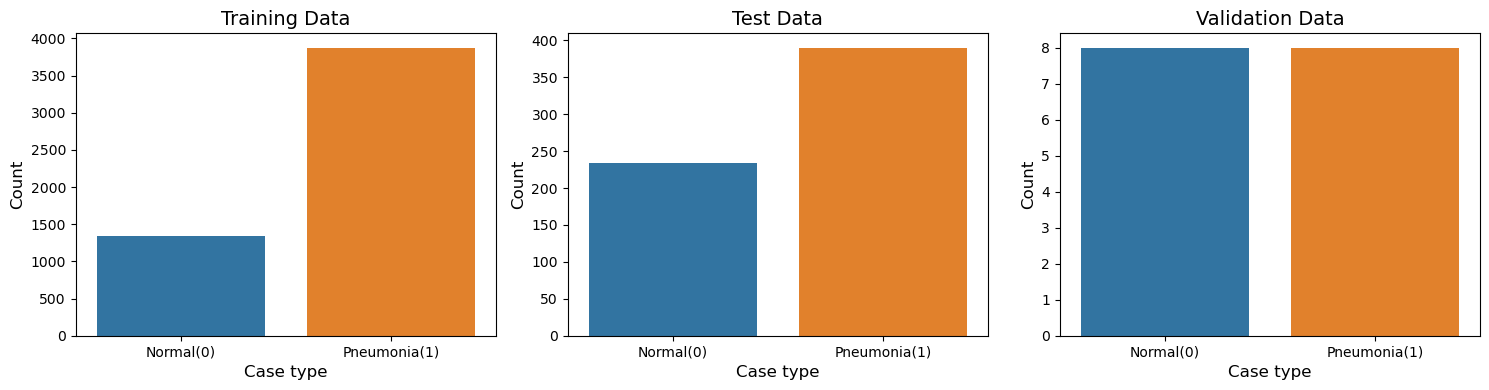

In [15]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
dfs = [pd.DataFrame(train_data, columns=['image', 'label']),
       pd.DataFrame(test_data, columns=['image', 'label']),
       pd.DataFrame(val_data, columns=['image', 'label'])]

# Plot for Training, Test, and Validation Data
for df, title, ax in zip(dfs, ['Training Data', 'Test Data', 'Validation Data'], axes):
    plot_case_count(df, title, ax)

plt.tight_layout()
plt.show()

# Preparing the Images
##  Now, we need to process the images to a format our model can understand
We're making sure they're all the same size and looking nice.
Also, we're changing them to black and white to keep things simple.
Our computer friend likes pictures in a certain shape, so we're getting them ready that way.

In [16]:
def process_data(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = img/255.0
    img = np.reshape(img, (224, 224, 1))
    return img

In [17]:
def compose_dataset(data):
    X = np.array([process_data(x[0]) for x in data])
    y = to_categorical([x[1] for x in data])
    return X, y

In [18]:
X_train, y_train = compose_dataset(train_data)
X_test, y_test = compose_dataset(test_data)
X_val, y_val = compose_dataset(val_data)

# Data Augmentation
## Let's enhance our dataset by creating variations of our images
We're adding a little twist, zoom, or flip to our pictures.
This way, our computer friend can learn from more examples and get smarter.

In [19]:
# Define Data Generator
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False
)
datagen.fit(X_train)

## Building Our Model
## Time to construct the brain of our project, our Convolutional Neural Network (CNN)
We're stacking layers of our CNN to help our computer friend learn the patterns in the pictures.
Each layer helps our computer friend see and understand different parts of the pictures.

In [20]:
def create_model():
    model = Sequential([
        Conv2D(16, (7,7), padding='same', activation='relu', input_shape=(224, 224, 1)),
        Conv2D(16, (7,7), padding='same', activation='relu'),
        MaxPooling2D((3,3)),
        
        Conv2D(32, (5,5), padding='same', activation='relu'),
        Conv2D(32, (5,5), padding='same', activation='relu'),
        MaxPooling2D((3,3)),
        
        Conv2D(64, (3,3), padding='same', activation='relu'),
        Conv2D(64, (3,3), padding='same', activation='relu'),
        MaxPooling2D((2,2)),
        
        Conv2D(128, (3,3), padding='same', activation='relu'),
        Conv2D(128, (3,3), padding='same', activation='relu'),
        MaxPooling2D((2,2)),
        
        Flatten(),
        
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(2, activation='softmax')
    ])
    
    optimizer = Adam(learning_rate=0.0001, decay=1e-5)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

model = create_model()

# Training Our Model
## Now comes the exciting part—teaching our model to understand X-ray images
We're showing our system lots of pictures and telling it if each one is "Normal" or "Pneumonia".
Our system is learning and adjusting its brain to get better at recognizing these patterns.

In [22]:
# Training the Model
callback = EarlyStopping(monitor='loss', patience=5)
history = model.fit(datagen.flow(X_train, y_train, batch_size=4),
                    validation_data=(X_test, y_test),
                    epochs=50,
                    verbose=1,
                    callbacks=[callback],
                    class_weight={0: 6.0, 1: 0.5})

Epoch 1/50
1304/1304 [==============================] - 194s 148ms/step - loss: 0.3015 - accuracy: 0.8491 - val_loss: 0.3677 - val_accuracy: 0.8381
Epoch 2/50
1304/1304 [==============================] - 187s 143ms/step - loss: 0.2870 - accuracy: 0.8635 - val_loss: 0.3613 - val_accuracy: 0.8862
Epoch 3/50
1304/1304 [==============================] - 187s 144ms/step - loss: 0.2252 - accuracy: 0.8873 - val_loss: 0.2707 - val_accuracy: 0.9038
Epoch 4/50
1304/1304 [==============================] - 202s 155ms/step - loss: 0.2262 - accuracy: 0.8942 - val_loss: 0.3337 - val_accuracy: 0.8702
Epoch 5/50
1304/1304 [==============================] - 188s 144ms/step - loss: 0.2074 - accuracy: 0.9051 - val_loss: 0.2566 - val_accuracy: 0.9071
Epoch 6/50
1304/1304 [==============================] - 188s 144ms/step - loss: 0.2082 - accuracy: 0.8982 - val_loss: 0.2444 - val_accuracy: 0.9071
Epoch 7/50
1304/1304 [==============================] - 188s 144ms/step - loss: 0.1831 - accuracy: 0.9143 - val_

# Saving Our Model
## We want to keep our hard work for future use
### This way, we can use it later without having to teach it all over again

In [23]:
# Saving the Model
model.save("cnn_v2.h5")

# Checking Our Model's Learning Journey
## Let's see how our model has improved over each training session
### We're checking if it's getting better at recognizing "Normal" and "Pneumonia" pictures.

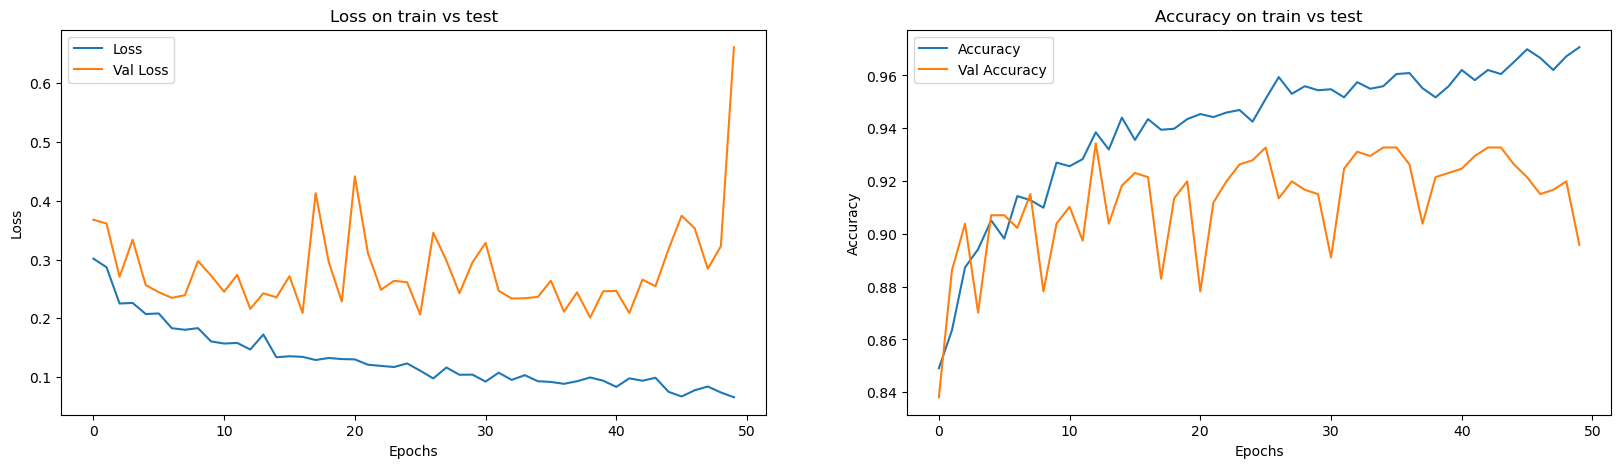

In [24]:
# Plotting Training History
def plot_history(history):
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss on train vs test')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Accuracy on train vs test')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_history(history)

# Visualizing Our Model's Predictions
## Time to see how well our model does on some test images
### We're showing it new pictures and asking it to tell us if each one is "Normal" or "Pneumonia"..

20/20 [==============================] - 5s 247ms/step


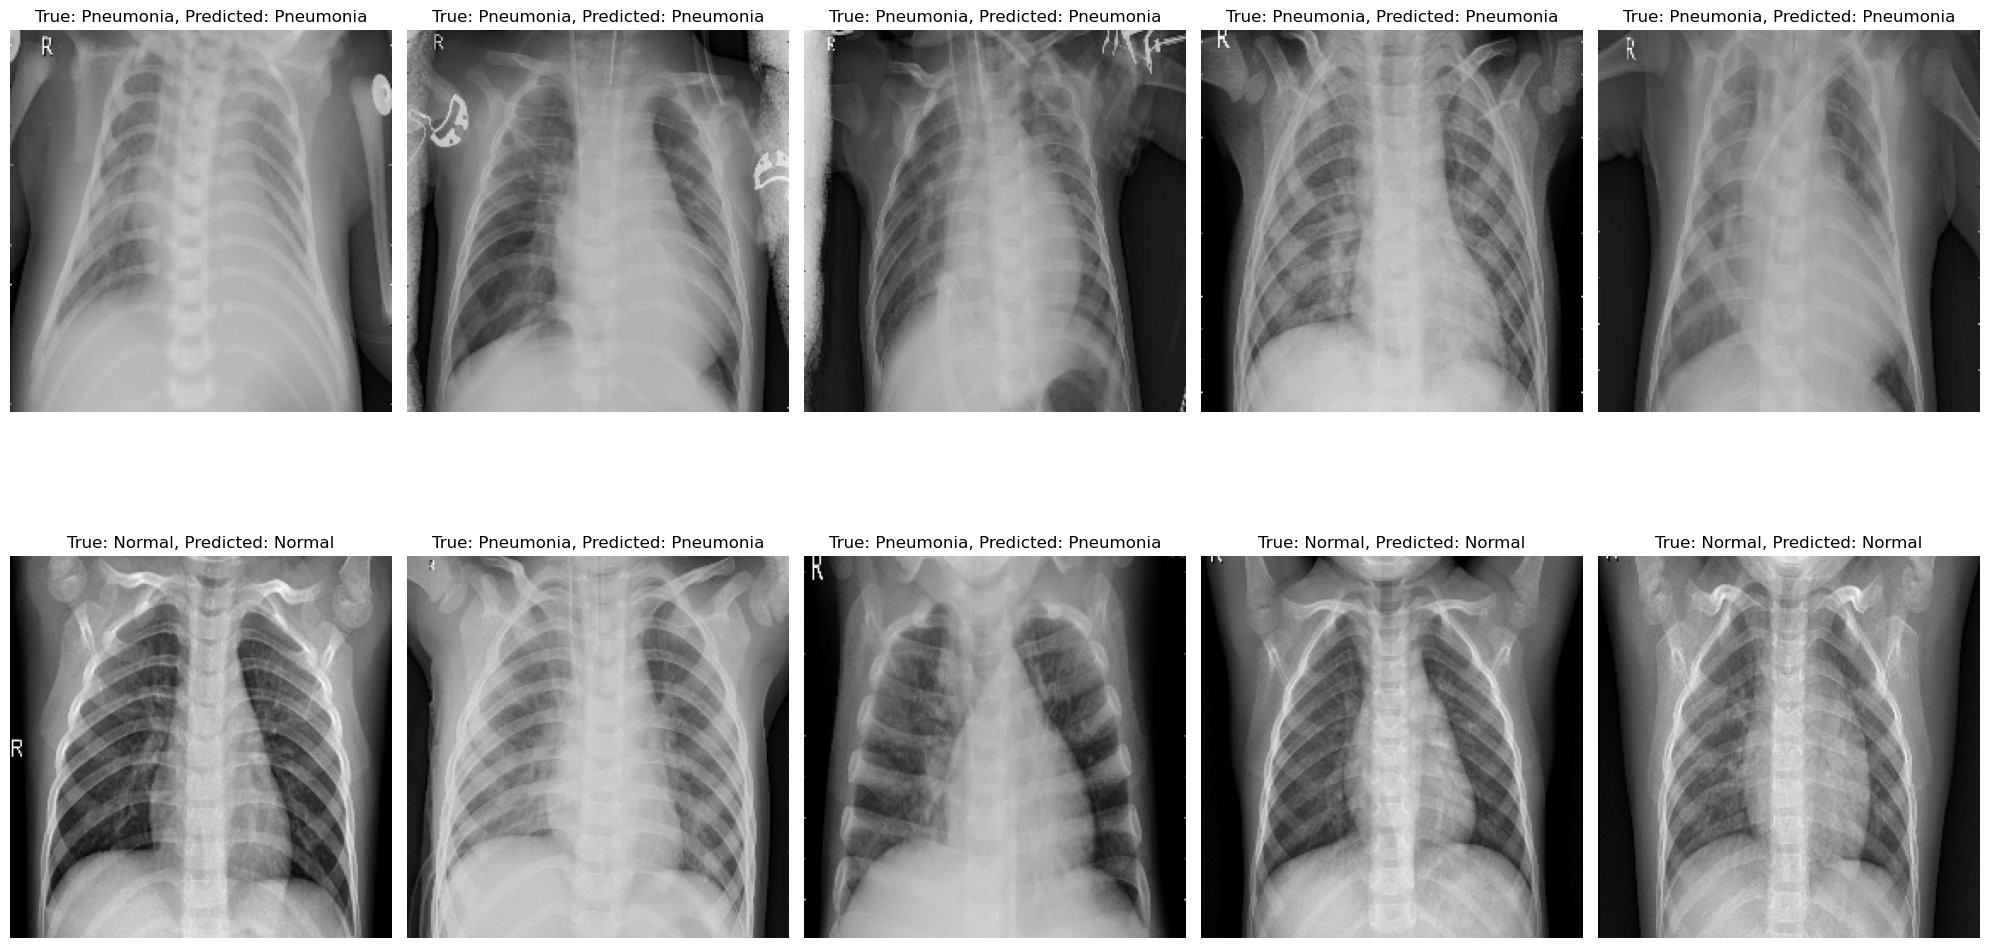

In [28]:

def visualize_predictions(model, X, y_true, class_labels):
    y_pred_prob = model.predict(X)
    y_pred = np.argmax(y_pred_prob, axis=1)

    # Select a random sample of images
    sample_indices = np.random.choice(range(len(X)), size=10, replace=False)

    plt.figure(figsize=(20, 12))
    for i, idx in enumerate(sample_indices):
        plt.subplot(2, 5, i + 1)
        plt.imshow(X[idx].reshape(224, 224), cmap='gray')
        plt.title(f"True: {class_labels[np.argmax(y_true[idx])]}, Predicted: {class_labels[y_pred[idx]]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

class_labels = ['Normal', 'Pneumonia']
visualize_predictions(model, X_test, y_test, class_labels)


# Evaluating Our Model
## Let's analyze how our model performed with a confusion matrix
We're showing it new pictures and asking it to tell us if each one is "Normal" or "Pneumonia".
Then, we're drawing these pictures with our system's guesses to see if it got them right.

20/20 [==============================] - 5s 255ms/step


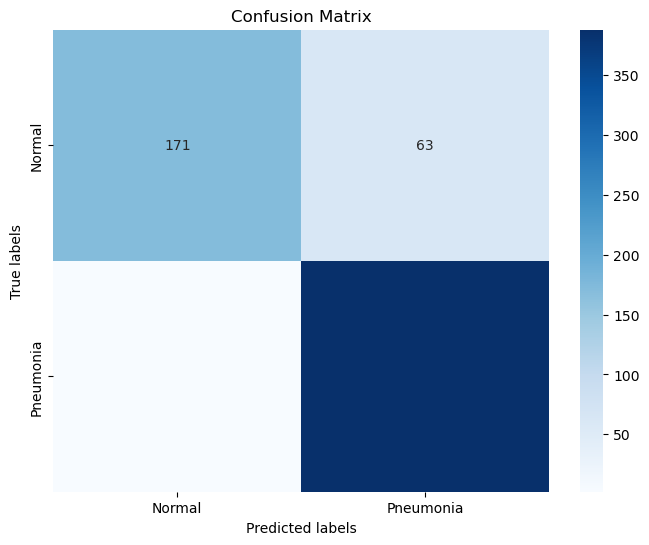

In [29]:
def plot_confusion_matrix(model, X, y_true, class_labels):
    y_pred_prob = model.predict(X)
    y_pred = np.argmax(y_pred_prob, axis=1)

    cm = confusion_matrix(np.argmax(y_true, axis=1), y_pred)
    cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

class_labels = ['Normal', 'Pneumonia']
plot_confusion_matrix(model, X_test, y_test, class_labels)


# Digging Deeper into Predictions
## What were the predicted probabilities for each image category?
We're drawing a chart to see how often it gets them mixed up.

20/20 [==============================] - 5s 253ms/step


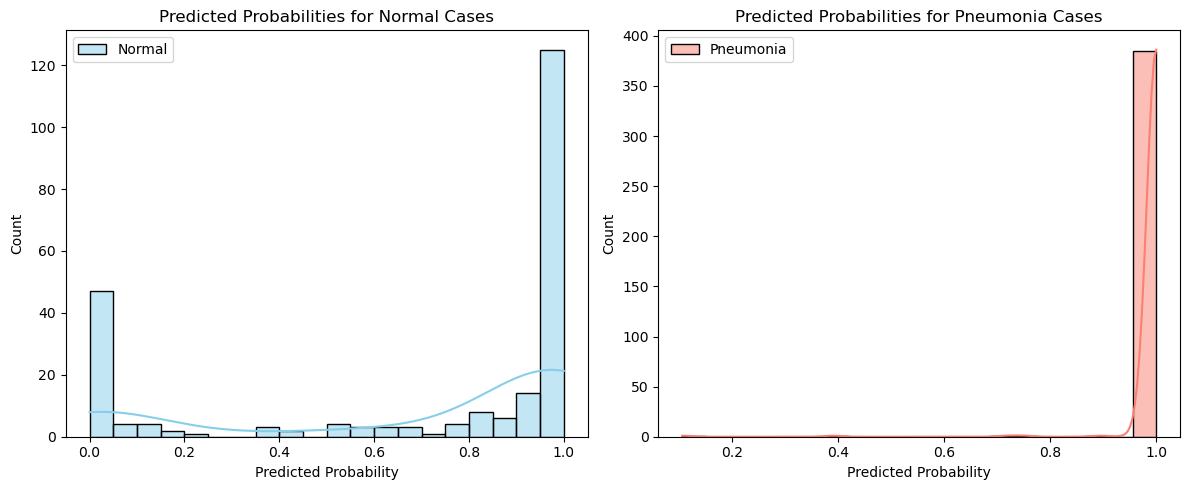

In [30]:
def plot_category_comparison(model, X, y_true, class_labels):
    y_pred_prob = model.predict(X)
    y_pred = np.argmax(y_pred_prob, axis=1)
    
    # Get indices for each class
    normal_indices = np.where(np.argmax(y_true, axis=1) == 0)[0]
    pneumonia_indices = np.where(np.argmax(y_true, axis=1) == 1)[0]
    
    # Get predicted probabilities for each class
    normal_pred_prob = y_pred_prob[normal_indices][:, 0]  # Probability for Normal class
    pneumonia_pred_prob = y_pred_prob[pneumonia_indices][:, 1]  # Probability for Pneumonia class

    # Create bar plots
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    sns.histplot(normal_pred_prob, bins=20, kde=True, color='skyblue', label='Normal')
    plt.xlabel('Predicted Probability')
    plt.ylabel('Count')
    plt.title('Predicted Probabilities for Normal Cases')
    plt.legend()

    plt.subplot(1, 2, 2)
    sns.histplot(pneumonia_pred_prob, bins=20, kde=True, color='salmon', label='Pneumonia')
    plt.xlabel('Predicted Probability')
    plt.ylabel('Count')
    plt.title('Predicted Probabilities for Pneumonia Cases')
    plt.legend()

    plt.tight_layout()
    plt.show()

class_labels = ['Normal', 'Pneumonia']
plot_category_comparison(model, X_test, y_test, class_labels)


# Predicting on New Images
## Finally, let's put our model to the test with some brand new X-ray images

In [53]:
from tensorflow.keras.models import load_model

model = load_model("cnn_v2.h5")


In [54]:
def process_single_image(img_path):
    img = cv2.imread(img_path)
    if img is None:
        print(f"Error: Unable to read image at {img_path}")
        return None
    img = cv2.resize(img, (224, 224))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = img / 255.0
    img = np.reshape(img, (1, 224, 224, 1))  # Add batch dimension
    return img

new_image = process_single_image("./Chest_x-ray_-_posteroanterior_view.jpg")


In [55]:
prediction = model.predict(new_image)


1/1 [==============================] - 0s 172ms/step


In [56]:
class_labels = ['Normal', 'Pneumonia']
predicted_class = class_labels[np.argmax(prediction)]
print("Predicted Class:", predicted_class)


Predicted Class: Normal


# Predicting on Another New Image
##  One more image to go!

In [62]:
def process_single_image(img_path):
    img = cv2.imread(img_path)
    if img is None:
        print(f"Error: Unable to read image at {img_path}")
        return None
    img = cv2.resize(img, (224, 224))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = img / 255.0
    img = np.reshape(img, (1, 224, 224, 1))  # Add batch dimension
    return img

new_image2 = process_single_image("./tb2.png")

In [63]:
prediction2 = model.predict(new_image2)

1/1 [==============================] - 0s 37ms/step


In [65]:
class_labels = ['Normal', 'Pneumonia']
predicted_class = class_labels[np.argmax(prediction2)]
print("Predicted Class:", predicted_class)

Predicted Class: Pneumonia


This project showcases the power of deep learning in medical image analysis, offering a glimpse into the potential of AI-driven diagnostics. By automating the classification of chest X-ray images for pneumonia detection, our system aims to enhance the efficiency and accuracy of medical practitioners. As we continue to refine and deploy this solution, the vision of improved patient care through cutting-edge technology becomes more tangible and promising.